# Predicting Loan Approval Status Using Applicant Data
## Phase 1: Data Preparation & Visualisation

## Table of Contents
* [Introduction](#itr) 
  + [Dataset Source](#Dataset-Source)
  + [Dataset Details](#Dataset-Details)
  + [Dataset Features](#Dataset-Features)
  + [Target Feature](#Target-Feature)
* [Goals and Objectives](#go)
* [Data Cleaning and Preprocessing](#Data-Cleaning-and-Preprocessing)
  + [Data Cleaning Steps](#Data-Cleaning-Steps)
  + [Sampling](#Sampling)
* [Data Exploration and Visualisation](#Data-Exploration-and-Visualisation)
  + [One-variable Plots](#One-variable-Plots)
  + [Two-variable Plots](#Two-variable-Plots)
  + [Three-variable Plots](#Three-variable-Plots)
* [Literature Review](#Literature-Review)
* [Summary and Conclusion](#Summary-and-Conclusion)
* [References](#References)



## Introduction <a id='itr'></a>

#### Dataset Source
This dataset was sourced from Kaggle (Lo, 2023) and is publicly available at: 
https://www.kaggle.com/datasets/taweilo/loan-approval-classification-data/data

#### Dataset Details
This dataset simulates a loan approval system for a Banking company that wishes to automate the loan eligibility process based on customer detail provided while filling online application form. These details include gender, age, education level, employment history, income, and requested loan information. The problem is to identify customer segments that are eligible for loan approval, allowing the bank to focus on these customers. This is a classification problem, with the goal of predicting whether a loan can be approved or not.

This dataset contains 45,000 observations (rows) and 14 columns (features) including both input variables and the binary target label (loan_status).

We load the dataset from the csv file using the read_csv() method and display 10 randomly sampled rows from the dataset. 

In [1]:
#Code Developement - [1]
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

# Assessment requirement
pd.set_option('display.max_columns', None) 

# Importing the data
dataset = pd.read_csv("Phase1_Group56.csv")

dataset.sample(10,random_state=999)

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
6574,23.0,male,Master,51433.0,4,RENT,6000.0,DEBTCONSOLIDATION,14.42,0.12,4.0,633,No,1
34781,27.0,female,Master,21811.0,4,RENT,1000.0,VENTURE,7.56,0.05,5.0,602,Yes,0
7961,24.0,female,Associate,66996.0,5,MORTGAGE,3000.0,DEBTCONSOLIDATION,11.12,0.04,2.0,555,No,0
38678,28.0,female,Associate,96590.0,8,MORTGAGE,8372.0,PERSONAL,8.12,0.09,5.0,707,Yes,0
7944,25.0,male,Master,63385.0,0,RENT,7000.0,HOMEIMPROVEMENT,10.59,0.11,2.0,671,No,0
34422,34.0,male,Master,58893.0,12,MORTGAGE,5000.0,DEBTCONSOLIDATION,12.48,0.08,10.0,625,Yes,0
30176,37.0,female,Associate,58599.0,14,MORTGAGE,3500.0,HOMEIMPROVEMENT,7.88,0.06,15.0,660,No,0
24366,27.0,male,Bachelor,87477.0,4,MORTGAGE,10000.0,DEBTCONSOLIDATION,10.99,0.11,9.0,607,No,0
35215,24.0,male,Master,90640.0,3,MORTGAGE,12000.0,HOMEIMPROVEMENT,14.14,0.13,4.0,569,Yes,0
1298,24.0,male,Bachelor,31512.0,2,MORTGAGE,1500.0,EDUCATION,9.91,0.05,3.0,654,Yes,0


In [2]:
print(dataset.shape) 

(45000, 14)


In [3]:
dataset.columns.values 

array(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt',
       'loan_intent', 'loan_int_rate', 'loan_percent_income',
       'cb_person_cred_hist_length', 'credit_score',
       'previous_loan_defaults_on_file', 'loan_status'], dtype=object)

#### Dataset Features
The features in our dataset are described in the table below. These descriptions are taken from the Kaggle data source.

In [4]:
from tabulate import tabulate

table = [['Feature Name', 'Data Type', 'Units', 'Description'], 
         ['person_age', 'Numeric', 'Years', 'Age of the loan applicant'], 
         ['person_gender', 'Nominal categorical', 'Category', 'Gender of the applicant (male, female)'], 
         ['person_education', 'Nominal categorical', 'Category', 'Highest education level of the applicant (Bachelor, Associate, \nHigh School, Master, Doctorate)'], 
         ['person_income', 'Numeric', 'USD', 'Annual income of the applicant'], 
         ['person_emp_exp', 'Numeric', 'Years', 'Total years of work experience'], 
         ['person_home_ownership', 'Nominal categorical', 'Category', 'Home ownership status (RENT, MORTGAGE, OWN, OTHER)'],
         ['loan_amnt', 'Numeric', 'USD', 'Requested loan amount'], 
         ['loan_intent', 'Nominal categorical', 'Category', 'Purpose of the loan (EDUCATION, MEDICAL, VENTURE, PERSONAL,\nDEBTCONSOLIDATION, HOMEIMPROVEMENT)'],
         ['loan_int_rate', 'Numeric', 'Rate (%)','Interest rate assigned to the loan'],
         ['loan_percent_income', 'Numeric', 'Percentage', 'Loan amount as a percentage of annual income'],
         ['cb_person_cred_hist_length', 'Numeric', 'Years', 'Length of credit history in years'],
         ['credit_score', 'Numeric', 'Score', 'Credit score of the applicant'],
         ['previous_loan_default_on_file', 'Binary', 'Flag', 'Credit bureau record of previous default (Yes/No)'],
         ['loan_status', 'Binary', 'Flag', 'Loan approval status (0 = rejected, 1 = approved)']]

print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))


╒═══════════════════════════════╤═════════════════════╤════════════╤═════════════════════════════════════════════════════════════════╕
│ Feature Name                  │ Data Type           │ Units      │ Description                                                     │
╞═══════════════════════════════╪═════════════════════╪════════════╪═════════════════════════════════════════════════════════════════╡
│ person_age                    │ Numeric             │ Years      │ Age of the loan applicant                                       │
├───────────────────────────────┼─────────────────────┼────────────┼─────────────────────────────────────────────────────────────────┤
│ person_gender                 │ Nominal categorical │ Category   │ Gender of the applicant (male, female)                          │
├───────────────────────────────┼─────────────────────┼────────────┼─────────────────────────────────────────────────────────────────┤
│ person_education              │ Nominal categorical │

#### Target Feature
The Target Feature is going to be the last column - loan status. The loan status is a numerical (binary) feature where 1 stands for loan being approved while 0 stands for the loan being rejected.


### Goals & Objectives <a id='go'></a>

The main objective of this project is two-fold: 

Phase1 - The primary focus is on data cleaning and preprocessing, which involves handling missing values, removing ID-like columns, performing data aggregation where necessary, and preparing the dataset for analysis. Additionally, this phase includes data exploration and visualisation, where appropriate charts, graphs, and visual interactions are used to better understand patterns and relationships within the data. 

Phase2 - We aim to build a predictive machine learning model that can automatically determine whether a loan application should be approved or not, based on applicant-related information. This can help financial institutions like banks streamline the loan application process, reduce manual effort and make data-driven lending decisions.

The specific objectives of this project are as follows:

- To understand and explore the dataset provided by the lending institution, including the distribution and relationship of various features such as age, income, loan amount, credit history and education level.

- To perform thorough data cleaning and preprocessing, identifying and handling missing values, inconsistencies, or outliers in the dataset.

- To visualize meaningful patterns and relationships in the data that may help distinguish between approved and rejected loan applications.

- To identify the most influential features in determining loan approval.

- To provide insights and actionable recommendations for how loan approval criteria can be optimized based on the findings.

### Data Cleaning and Preprocessing


#### Data Cleaning Steps
- Check for missing values
- Validating data types
- Handling outliers and Unrealistic values
- Removing duplicates


In [5]:
dataset.columns

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')

In [6]:
dataset.dtypes 

person_age                        float64
person_gender                      object
person_education                   object
person_income                     float64
person_emp_exp                      int64
person_home_ownership              object
loan_amnt                         float64
loan_intent                        object
loan_int_rate                     float64
loan_percent_income               float64
cb_person_cred_hist_length        float64
credit_score                        int64
previous_loan_defaults_on_file     object
loan_status                         int64
dtype: object

While reviewing the data types of all columns, we found them to be appropriate except for the "person_age" column. Although having it as a float is technically acceptable, we chose to convert it to an integer for better consistency and to reflect realistic age values.

In [7]:
#Code Developement - [2]
#Converts the 'person_age' column to integer data type
dataset['person_age'] = dataset['person_age'].astype(int) 

In [8]:
dataset.dtypes

person_age                          int64
person_gender                      object
person_education                   object
person_income                     float64
person_emp_exp                      int64
person_home_ownership              object
loan_amnt                         float64
loan_intent                        object
loan_int_rate                     float64
loan_percent_income               float64
cb_person_cred_hist_length        float64
credit_score                        int64
previous_loan_defaults_on_file     object
loan_status                         int64
dtype: object

In [9]:
#Looking for missing values
dataset.isnull().sum() 

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

Fortunately, the dataset does not contain any missing values. This means we do not need to perform imputation techniques.

In [10]:
dataset.duplicated().sum()

0

In addition, the dataset does not have any duplicate values.

Let’s now examine the variables in the dataset. We started by exploring the numeric columns and use the .describe() function to generate summary statistics for these features.

In [11]:
#Code Developement - [1]
from IPython.display import display, HTML
display(HTML('<b>Table 1: Summary of numerical features</b>')) 
dataset.describe() 

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


Displaying all the numeric features along with their unique values and their frequencies helps us gain a general understanding of how the numeric data is distributed across the dataset.

In [12]:
#Code Developement - [3]
numerical_cols = ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score', 'loan_status']
for n in numerical_cols: 
    print(f'\n{n} has the unique value below:')
    print(dataset[n].unique())
    print('\n')
    print(dataset[n].value_counts())


person_age has the unique value below:
[ 22  21  25  23  24  26 144 123  20  32  34  29  33  28  35  31  27  30
  36  40  50  45  37  39  44  43  41  46  38  47  42  48  49  58  65  51
  53  66  61  54  57  59  62  60  55  52  64  70  78  69  56  73  63  94
  80  84  76  67 116 109]


person_age
23     5254
24     5138
25     4507
22     4236
26     3659
27     3095
28     2728
29     2455
30     2021
31     1645
32     1403
21     1289
33     1240
34      980
35      847
36      740
37      666
38      503
39      389
40      349
41      303
42      247
43      215
44      177
45      135
46      114
47      112
48       93
49       59
50       56
51       46
52       42
53       35
54       24
55       24
58       20
56       20
57       17
20       17
60       16
61       12
66       11
65       10
70        7
64        7
62        7
59        6
69        5
144       3
73        3
63        3
123       2
78        1
94        1
80        1
84        1
76        1
67        1
116   

Now doing the same but only for categorical features

In [13]:
#Code Developement - [1]
display(HTML('<b>Table 2: Summary of categorical features</b>'))
dataset.describe(include = 'object')

,person_gender,person_education,person_home_ownership,loan_intent,previous_loan_defaults_on_file
count,45000,45000,45000,45000,45000
unique,2,5,4,6,2
top,male,Bachelor,RENT,EDUCATION,Yes
freq,24841,13399,23443,9153,22858


We converted the values in categorical columns to lowercase to standardize the data and avoid duplication caused by inconsistent text formatting. This makes it cleaner, ensuring uniformity and will help in the encoding in the later phase.

In [14]:
#Converts values to lowercase
dataset['person_home_ownership'] = dataset['person_home_ownership'].str.lower()  
dataset['loan_intent'] = dataset['loan_intent'].str.lower()  
dataset['person_education'] = dataset['person_education'].str.lower()  
dataset['previous_loan_defaults_on_file'] = dataset['previous_loan_defaults_on_file'].str.lower()  

In [15]:
#Code Developement - [3]
#Listing all the values & their frequencies from categorical columns
categorical_cols = ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']

for c in categorical_cols:
    print(f'\n{c} has the unique value below:')
    print(dataset[c].unique())
    print('\n')
    print(dataset[c].value_counts())


person_gender has the unique value below:
['female' 'male']


person_gender
male      24841
female    20159
Name: count, dtype: int64

person_education has the unique value below:
['master' 'high school' 'bachelor' 'associate' 'doctorate']


person_education
bachelor       13399
associate      12028
high school    11972
master          6980
doctorate        621
Name: count, dtype: int64

person_home_ownership has the unique value below:
['rent' 'own' 'mortgage' 'other']


person_home_ownership
rent        23443
mortgage    18489
own          2951
other         117
Name: count, dtype: int64

loan_intent has the unique value below:
['personal' 'education' 'medical' 'venture' 'homeimprovement'
 'debtconsolidation']


loan_intent
education            9153
medical              8548
venture              7819
personal             7552
debtconsolidation    7145
homeimprovement      4783
Name: count, dtype: int64

previous_loan_defaults_on_file has the unique value below:
['no' 'yes']


previo

Plotting Box plots for all the numeric features. This helps us understand the distribution, detect outliers and spot unsual patterns quickly

In [16]:
import matplotlib.pyplot as plt  
import seaborn as sns 

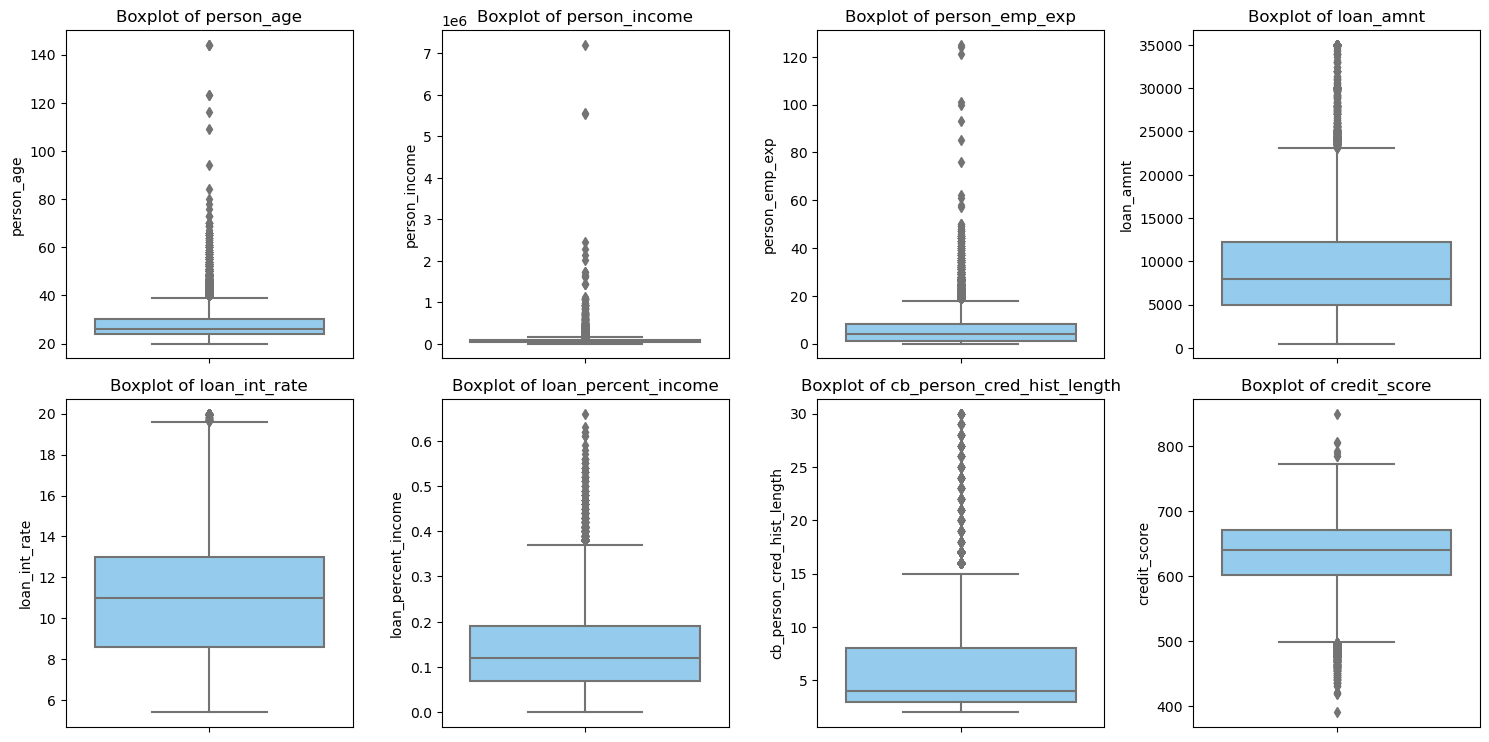

In [17]:
#Code Developement - [4]
#Creating another array for numerical features without the loan_status i.e. target variable
numerical = [
    'person_age', 'person_income', 'person_emp_exp', 'loan_amnt',
    'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
    'credit_score']

plt.figure(figsize=(15, 15))
for i, col in zip(range(1, len(numerical)+1), numerical):
    plt.subplot(4, 4, i)
    sns.boxplot(y=dataset[col], color='lightskyblue')
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()


The boxplots of the numerical features provide insights into the distribution and presence of outliers in the dataset. 
- person_age column seems to have some obvious outliers. It has a few values above the age of 100 which is unrealistic and most probably must be dealt with.
- person_income shows extreme outliers with a few applicants earning significantly more than the average.
- person_emp_exp also has values showing over 100, suggesting possible data entry issues or rare long-term careers.
- The loan_amnt typically falls below $20,000, though some larger loan requests appear as outliers, which is fine since loan amount can be a bit higher.
- loan_int_rate is concentrated between 5% and 18%, with few loans having unusually high rates.
- loan_percent_income has a lot of outliers. Most values lie below 30%, some go as high as 60–70%, indicating potential financial strain or higher risk. This could be a strong predictor of loan rejection or default and should be monitored in modeling.
- For cb_person_cred_hist_length (credit history length), the majority of applicants have histories shorter than 10 years, though a few have much longer credit records.
- credit_score includes several low values which could strongly influence the loan approval decision.
  

Fixing the age outliers by dropping .

In [18]:
#Displaying records where the person_age is greater than 100 
dataset[dataset['person_age'] > 100] 

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
81,144,male,bachelor,300616.0,125,rent,4800.0,venture,13.57,0.02,3.0,789,no,0
183,144,male,associate,241424.0,121,mortgage,6000.0,education,11.86,0.02,2.0,807,no,0
575,123,female,high school,97140.0,101,rent,20400.0,education,10.25,0.21,3.0,805,yes,0
747,123,male,bachelor,94723.0,100,rent,20000.0,venture,11.01,0.21,4.0,714,yes,0
32297,144,female,associate,7200766.0,124,mortgage,5000.0,personal,12.73,0.00,25.0,850,no,0
37930,116,male,bachelor,5545545.0,93,mortgage,3823.0,venture,12.15,0.00,24.0,708,no,0
38113,109,male,high school,5556399.0,85,mortgage,6195.0,venture,12.58,0.00,22.0,792,no,0


In [19]:
#Looking for number of outliers in the age column
dataset[dataset['person_age'] > 100].shape[0] 

7

In [20]:
#Removing these values
dataset = dataset[(dataset['person_age'] <= 100)]

In [21]:
#Code Developement - [5]
dataset[dataset['person_age'] > 100].shape[0]

0

In [22]:
dataset[dataset['person_emp_exp'] > 100] 

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status


Looks like dropping the age outliers likely dropped the values with having "person_emp_exp" over 100 years

In [23]:
dataset.shape

(44993, 14)

#### Sampling

In [24]:
dataset.sample(10,random_state=999)

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
13065,24,female,master,105769.0,3,mortgage,10000.0,medical,6.17,0.09,4.0,686,yes,0
7140,24,male,bachelor,72818.0,0,rent,7000.0,education,7.51,0.10,4.0,662,no,1
36976,23,male,high school,100446.0,0,rent,12000.0,debtconsolidation,9.08,0.12,4.0,534,yes,0
28833,31,female,associate,116167.0,11,mortgage,9600.0,medical,5.99,0.08,5.0,567,no,0
34546,35,female,high school,65677.0,12,mortgage,2000.0,homeimprovement,6.71,0.03,12.0,708,no,0
24978,31,female,bachelor,96001.0,3,mortgage,5000.0,debtconsolidation,8.00,0.05,9.0,700,no,0
29291,37,female,high school,111472.0,14,rent,21000.0,venture,11.63,0.19,15.0,672,no,0
38057,27,male,master,42914.0,2,own,4197.0,medical,10.60,0.10,5.0,591,no,0
25038,29,female,associate,97022.0,5,mortgage,25000.0,homeimprovement,7.49,0.26,7.0,628,yes,0
1302,24,male,high school,71664.0,0,rent,16000.0,medical,16.45,0.22,2.0,587,no,1


## Data Exploration and Visualisation 

#### One-variable Plots

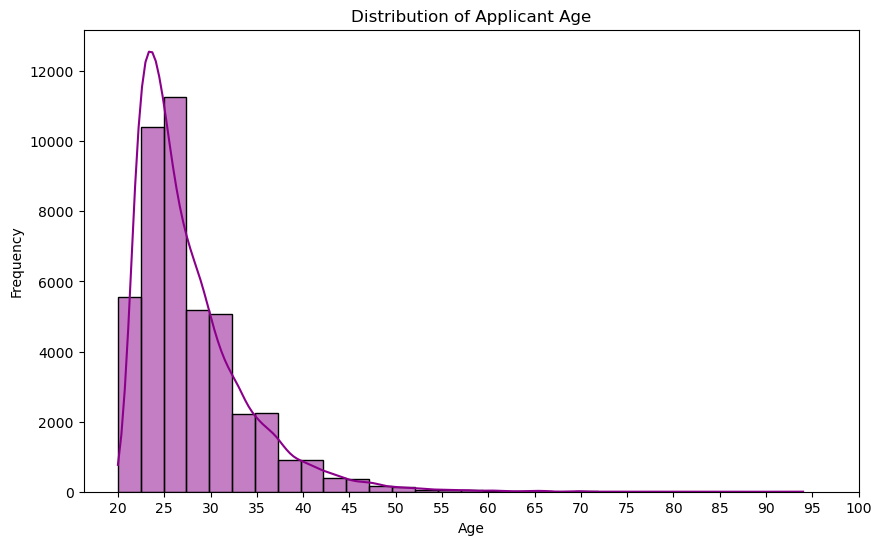

In [25]:
#Code Developement - [6], [7], [10]
# Plotting the Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(dataset['person_age'], bins=30, color = 'darkmagenta', kde=True)
plt.title('Distribution of Applicant Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xticks(range(20, 101, 5))
plt.show()

This histogram shows the distribution of applicant ages. The plot reveals that most loan applicants are between 25 and 45 years old, with a gradual decline in frequency as age increases. This suggests most applicants are in their working-age years, particularly between 25–45. 

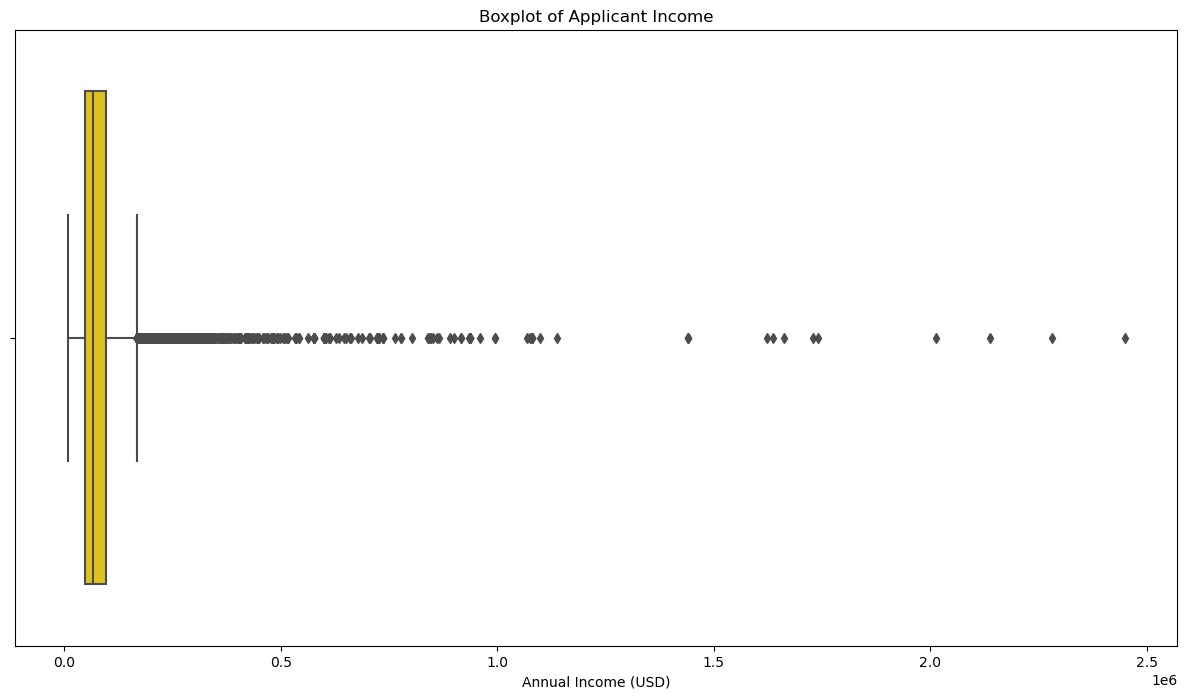

In [26]:
#Code Developement - [6], [7]
# Box-plot for applicant income
plt.figure(figsize=(15, 8))
sns.boxplot(x = dataset['person_income'], color='gold')
plt.title("Boxplot of Applicant Income")
plt.xlabel("Annual Income (USD)")
plt.xticks(fontsize=10)
plt.show()


This boxplot visualizes the distribution of annual income among applicants. The central box shows that the majority of incomes lie below approximately $100,000. However, a long right whisker and many individual points indicate the presence of high-income outliers. This suggests there are a few high-income indiviudals but majority of them earn moderate incomes.

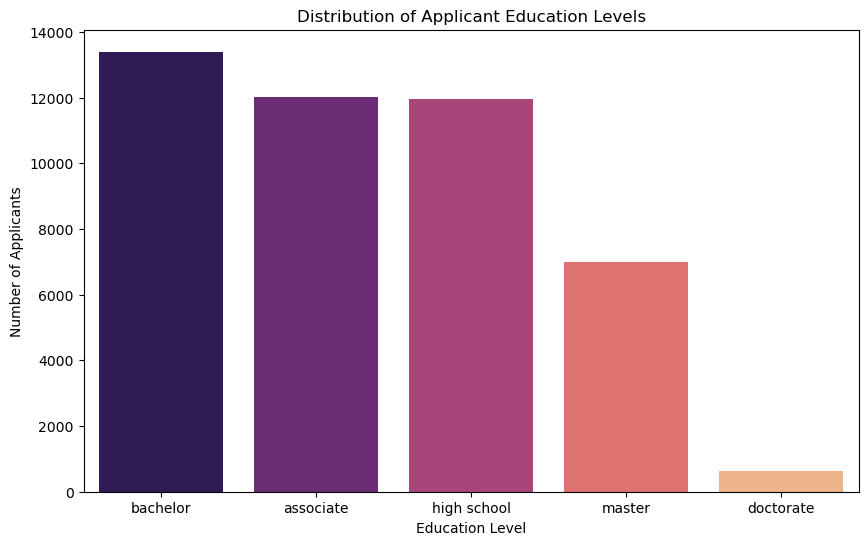

In [27]:
#Code Developement - [6], [8], [9]
# Bar-chart for applicant education levels
plt.figure(figsize=(10, 6))
edu_counts = dataset['person_education'].value_counts()
sns.barplot(x=edu_counts.index, y=edu_counts.values, palette='magma')
plt.title("Distribution of Applicant Education Levels")
plt.xlabel("Education Level")
plt.ylabel("Number of Applicants")
plt.show()

This bar chart shows the count of applicants across different education levels. The most common levels are “high school” and “bachelor,” followed by “associate” and “master.” “Doctorate” is the least common. Most applicants have mid-level educational qualifications, with relatively few having pursued postgraduate or doctoral studies.

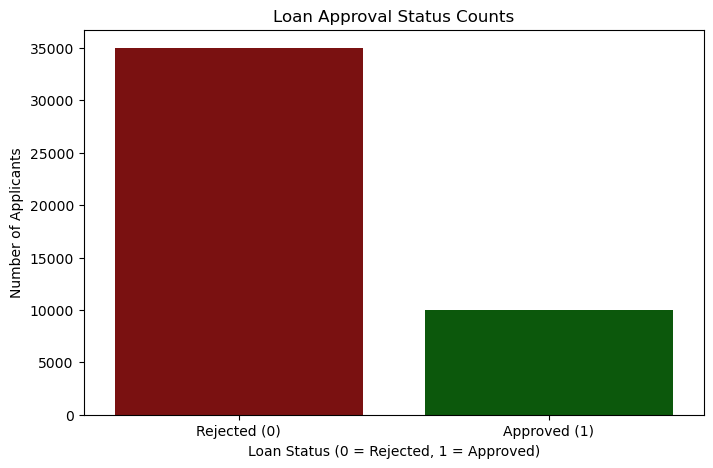

In [28]:
#Code Developement - [6], [7]
plt.figure(figsize=(8, 5))
sns.countplot(x='loan_status', data=dataset, palette={0: 'darkred', 1: 'darkgreen'})
plt.title("Loan Approval Status Counts")
plt.xlabel("Loan Status (0 = Rejected, 1 = Approved)")
plt.ylabel("Number of Applicants")
plt.xticks([0, 1], ['Rejected (0)', 'Approved (1)'])
plt.show()

The countplot shows that the majority of loan applications are rejected (loan_status = 0), with approvals (loan_status = 1) being significantly fewer. Most loan applications are rejected, which suggests a strict approval policy or high applicant risk. This imbalance needs to be addressed in model training, as the classifier may become biased toward predicting rejections.

#### Two-variable Plots

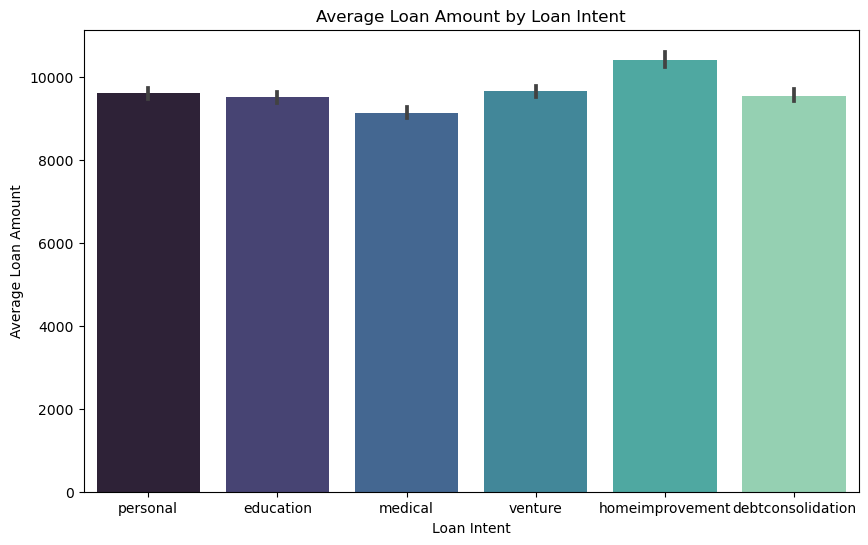

In [29]:
#Code Developement - [6], [8], [9]
# Bar-chart for Loan amount by Loan intent
plt.figure(figsize=(10, 6))
sns.barplot(x='loan_intent', y='loan_amnt', data=dataset, estimator=np.mean, palette='mako')
plt.title("Average Loan Amount by Loan Intent")
plt.xlabel("Loan Intent")
plt.ylabel("Average Loan Amount")
plt.show()

This bar plot displays the average loan amount requested across different loan purposes (e.g., education, medical, debt consolidation). It reveals that venture and home improvement loans tend to have the highest average amounts, while education and medical loans are typically lower. Loan purpose vs the amount borrowed - Business-related or home-related loans tend to involve higher funding compared to personal or educational needs.

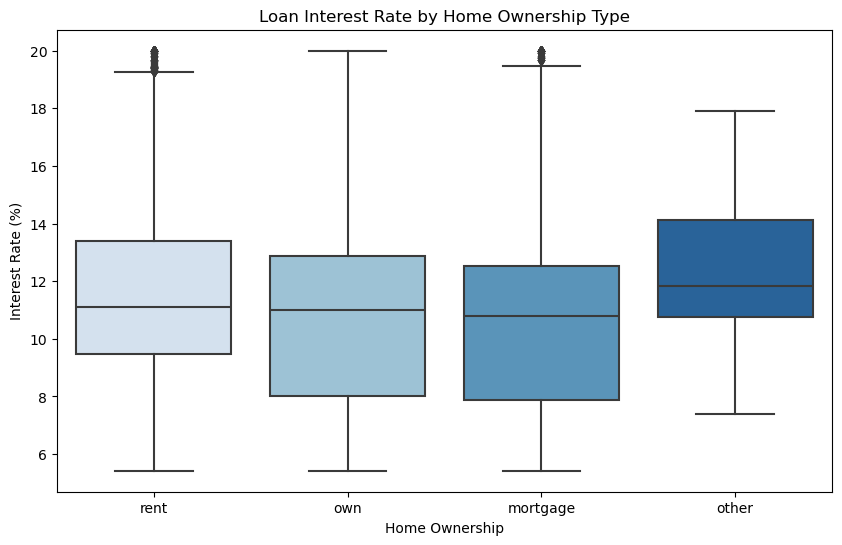

In [30]:
#Code Developement - [6], [8]
# Box-plot for Loan interest rate by Home Ownernship type
plt.figure(figsize=(10, 6))
sns.boxplot(x='person_home_ownership', y='loan_int_rate', data=dataset, palette='Blues')
plt.title("Loan Interest Rate by Home Ownership Type")
plt.xlabel("Home Ownership")
plt.ylabel("Interest Rate (%)")
plt.show()

This boxplot shows how loan interest rates vary based on the applicant's home ownership status (own, rent, mortgage, other). People who rent or fall into the “other” category appear to receive loans with higher interest rates, while owners and those with mortgages tend to get lower rates. This suggests the stronger the loan security the lesser the interest rate. 

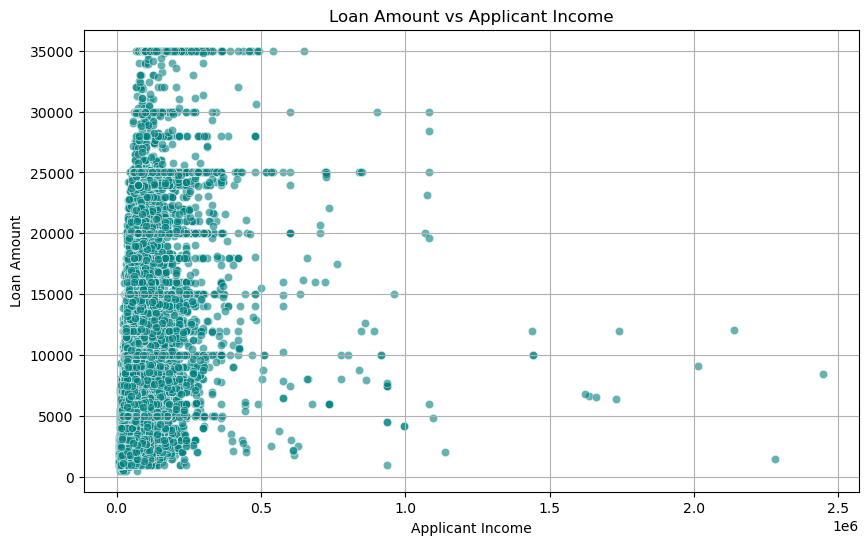

In [31]:
#Code Developement - [6], [7], [11]
# Scatter-plot of Loan amount vs Applicant income
plt.figure(figsize=(10, 6))
sns.scatterplot(x='person_income', y='loan_amnt', data=dataset, alpha=0.6, color='teal')
plt.title("Loan Amount vs Applicant Income")
plt.xlabel("Applicant Income")
plt.ylabel("Loan Amount")
plt.grid(True)
plt.show()


This scatterplot compares individual applicants’ income with the loan amount they requested. The points are dispersed without a strong linear pattern, though higher-income applicants tend to request larger loans in some cases. However, the relationship is not strongly linear and many lower-income applicants also request large loans.
While higher income can support higher loan requests, there’s significant variability, suggesting that loan size is not strictly determined by income alone.

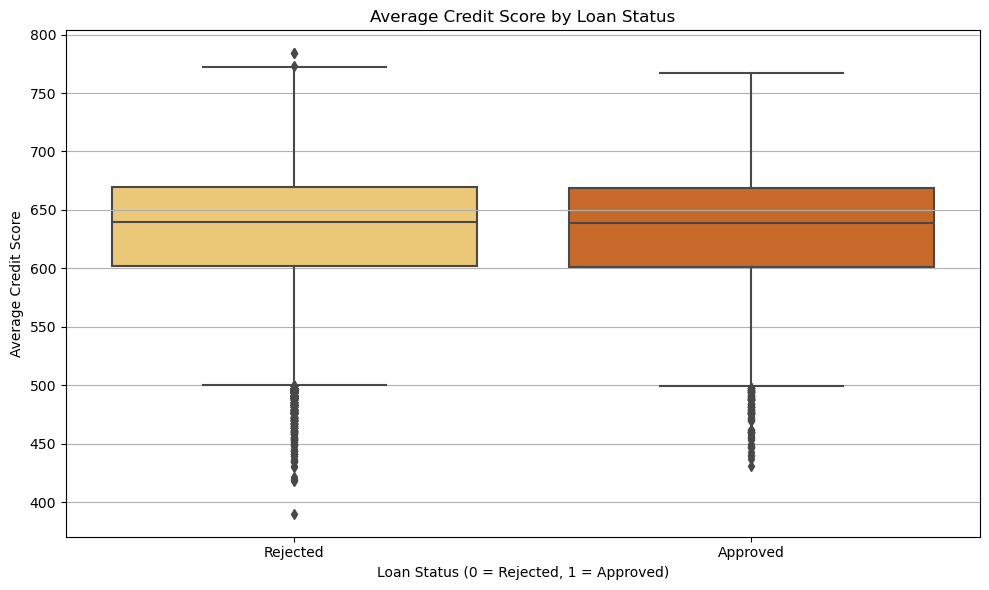

In [32]:
#Code Developement - [6], [8]
# Box-plot for Average credit score by Loan status
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='credit_score', data=dataset, palette='YlOrBr')
plt.title("Average Credit Score by Loan Status")
plt.xlabel("Loan Status (0 = Rejected, 1 = Approved)")
plt.ylabel("Average Credit Score")
plt.xticks([0, 1], ['Rejected', 'Approved'])
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

This box plot compares the average credit scores between approved and rejected applicants. We were expecting that  Approved applicants (loan_status = 1) clearly must have higher average credit scores than those who were rejected.
However suprisngly enough both tend to follow similar ranges. This implies that people with high credit scores have also been rejected in a fair amount. Credit score is simply one of the factors and not the most prominent factor to classily the loan status variable.

#### Three-variable Plots

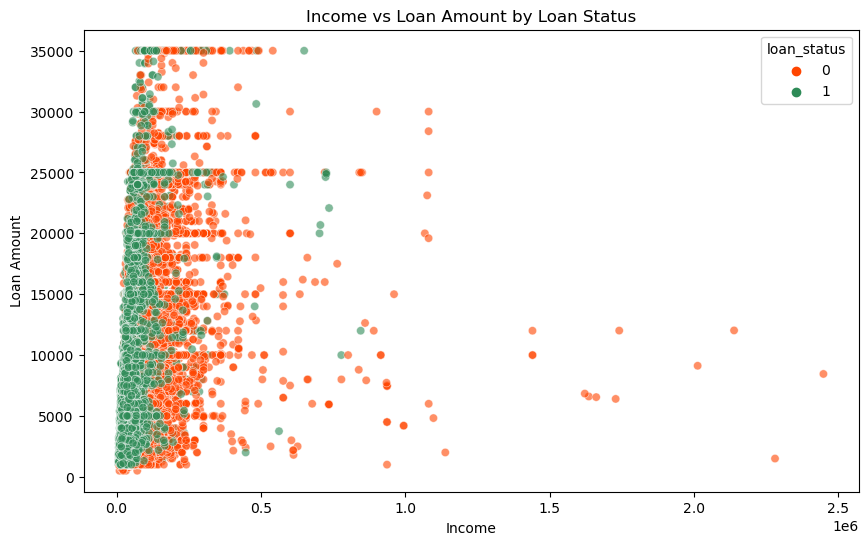

In [33]:
#Code Developement - [6], [7], [8], [11]
# Scatter plot for Income vs Loan Amount vs Loan Status
plt.figure(figsize=(10, 6))
sns.scatterplot(x='person_income', y='loan_amnt', hue='loan_status', data=dataset, palette={0: 'orangered', 1: 'seagreen'},
    alpha=0.6)
plt.title("Income vs Loan Amount by Loan Status")
plt.xlabel("Income")
plt.ylabel("Loan Amount")
plt.show()

This scatterplot shows the relationship between income and loan amount, colored by whether the loan was approved or rejected. Approved loans (green) are spread more consistently across income levels, while rejected loans (red) appear more concentrated in the lower-income region. This suggests higher income tends to improve the chances of loan approval. Rejected applications are more frequent among lower-income individuals requesting large loans.



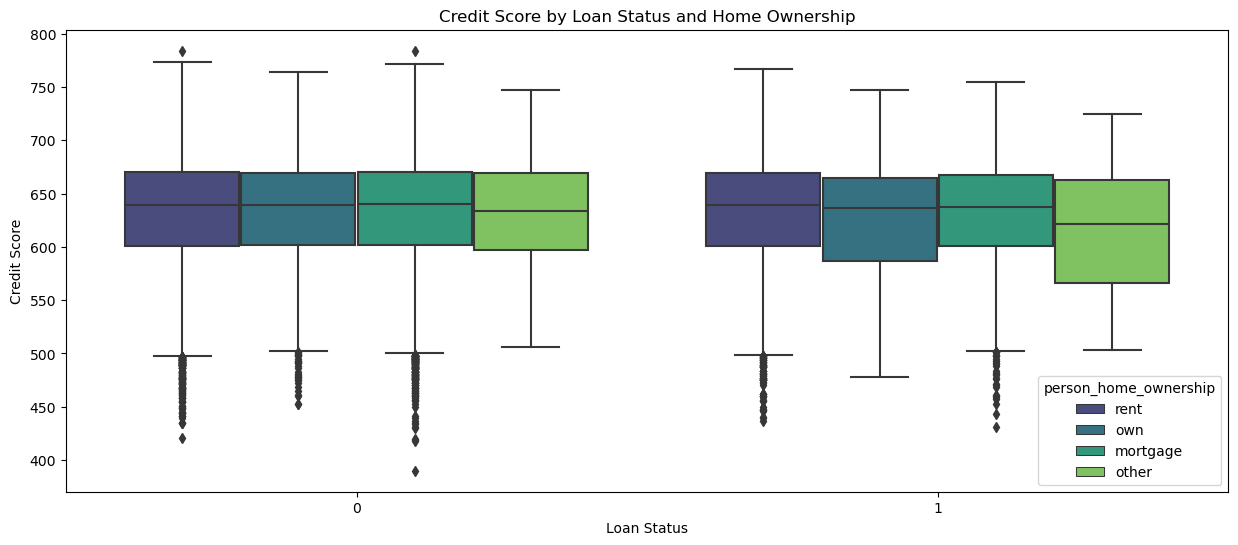

In [34]:
#Code Developement - [6], [8]
# Box-plot for Credit Score by Loan Status and Home Ownership
plt.figure(figsize=(15, 6))
sns.boxplot(x='loan_status', y='credit_score', hue='person_home_ownership', data=dataset, palette='viridis')
plt.title("Credit Score by Loan Status and Home Ownership")
plt.xlabel("Loan Status")
plt.ylabel("Credit Score")
plt.show()


This multi-category boxplot compares credit scores based on loan approval status and home ownership type. Across all ownership types, approved applicants consistently have slightly higher credit scores than those rejected. Both credit score and home ownership status influence loan approval. Owning a home is associated with higher credit scores and increased approval likelihood.

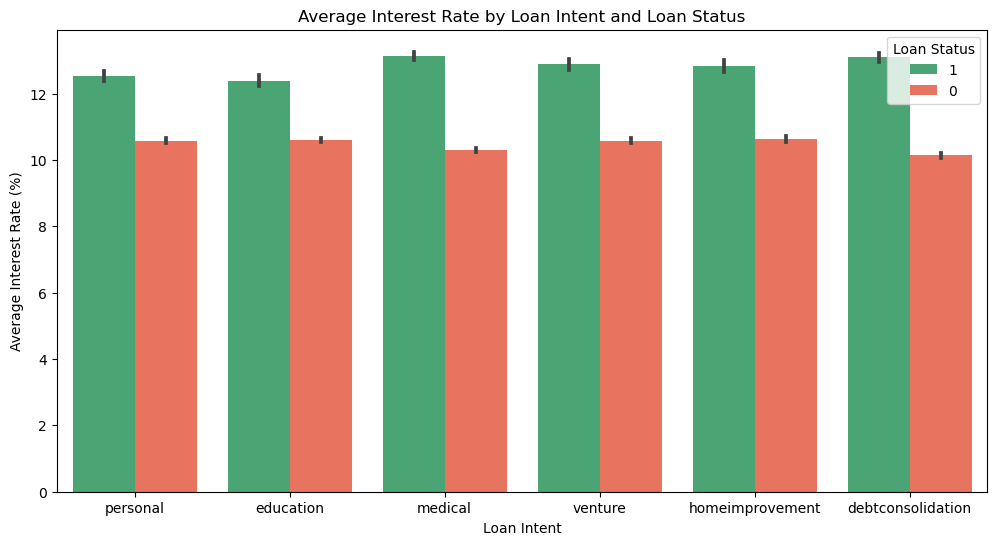

In [35]:
#Code Developement - [6], [7], [8], [9], [11]
# Bar-plot for Average Interest Rate by Loan Intent and Loan Status
plt.figure(figsize=(12, 6))
sns.barplot(x='loan_intent', y='loan_int_rate', hue=dataset['loan_status'].astype(str), data=dataset, estimator=np.mean,
    palette={'0': 'tomato', '1': 'mediumseagreen'})
plt.title("Average Interest Rate by Loan Intent and Loan Status")
plt.xlabel("Loan Intent")
plt.ylabel("Average Interest Rate (%)")
plt.legend(title='Loan Status')
plt.show()

This barplot compares the average interest rates across different loan purposes (loan intents), further split by whether the loan was approved (1, green) or rejected (0, red). In most categories, rejected loans tend to have higher interest rates compared to approved ones, especially for personal and venture loans. This can be interpreted as higher interest rates are more often associated with loan rejections, possibly indicating that risky or costly loans are less likely to be approved. Loan purpose also influences average interest rates.

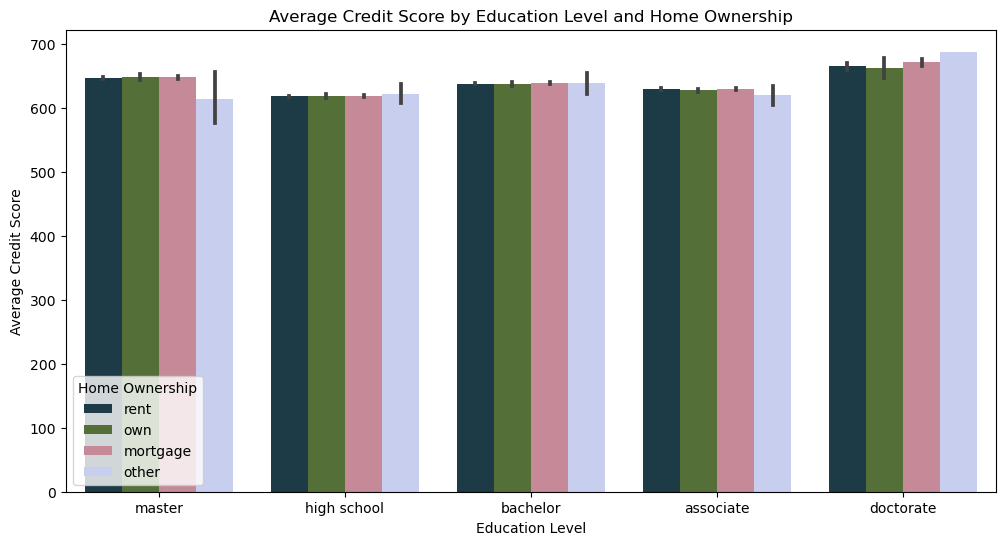

In [36]:
#Code Developement - [6], [8]
# Bar-plot for Average Credit Score by Education Level and Home Ownership
plt.figure(figsize=(12, 6))
sns.barplot(x='person_education', y='credit_score', hue='person_home_ownership', data=dataset, estimator=np.mean,
    palette='cubehelix')
plt.title("Average Credit Score by Education Level and Home Ownership")
plt.xlabel("Education Level")
plt.ylabel("Average Credit Score")
plt.legend(title='Home Ownership')
plt.show()

This grouped barplot shows how average credit scores vary by education level, further broken down by home ownership type. Across all education levels, those who own homes tend to have higher credit scores than those who rent or fall into other categories. "Doctorate" and "Master" have slightly high credit scores which indicates that education and home ownership both correlate with credit score. Homeowners generally have stronger credit profiles, and higher education is mildly associated with higher credit scores.

## Literature Review

In recent years, the financial industry has increasingly adopted machine learning (ML) techniques to automate and enhance decision-making processes, including loan approval. Before developing any ML model, it is essential to clean the dataset and understand the distribution of features and their relationships with the target variable. These foundational steps, commonly grouped under data preprocessing and exploratory data analysis (EDA), play a critical role in ensuring that the model is both accurate and fair. This review presents recent academic research on these preparatory steps, specifically in the context of financial and loan-related datasets.

Missing values are common in real-world financial datasets. Kumar et al. (2021) emphasized that missing or inconsistent entries in features such as income and employment status can negatively impact model accuracy. They recommended preprocessing as an essential step before applying ensemble models for loan prediction. While our dataset did not contain missing values, reviewing these studies helped us understand the importance of handling such issues and the risks of skipping this step.

Santosa, C.M.P. (2024) also highlighted the importance of ensuring data quality in loan prediction tasks for rural banking systems. Their study focused on removing logically invalid entries during the preprocessing phase. In our project, this motivated us to carefully review values and correct unrealistic entries—such as ages above 100 years and work experience exceeding 100 years—which helped improve the quality of the dataset before model building.

Outlier detection is a key part of preprocessing, especially in financial fields like person_income or loan_amnt. Brown and Mues (2012) used interquartile range (IQR) methods and z-score filtering to clean datasets before applying ML models. Our Phase 1 project followed similar logic to remove implausible values (like applicants with extremely high income or unreasonable age). Auwul et al. (2023) also pointed out that filtering out extreme values and reducing skew in the data helped improve hybrid model performance when applying big data analytics to credit prediction. Our project reviewed numerical columns using boxplots, a standard visualization technique for spotting outliers.

EDA involves understanding variable distributions and feature relationships. Moro et al. (2014) demonstrated how EDA can be used to study customer responses in a bank telemarketing dataset. They used histograms, bar charts, and correlation matrices to reveal trends and class imbalances. Inspired by this, we used similar visualization techniques in Phase 1—exploring how variables such as education level, employment experience, and income are associated with loan approval.

Agarwal et el. (2024) explored the role of EDA in evaluating preprocessing steps for ensemble models. His work showed how grouped and trivariate visualizations helped identify variable interactions and bias. Similarly, we examined how loan approval rates varied across groups like education and gender using grouped bar plots and interaction plots. Similarly, Salvi et al. (2021) provided practical guidance on data preprocessing and visualization in the context of home loan datasets. This helped us design our own exploratory data analysis steps to detect outliers, explore categorical distributions, and prepare the dataset for modelling in the next phase.

Chen and Guestrin (2016), the authors of XGBoost, noted that encoding strategies like label encoding and one-hot encoding must be tailored to the type of algorithm being used. Tree-based models like theirs can handle label-encoded variables, while linear models require one-hot encoding to prevent ordinal interpretation of categorical values. In Phase 1, we analysed feature cardinality and planned encoding strategies accordingly for model building in Phase 2.

Melese et al. (2023) further explained that creating domain-informed features, such as credit-to-income ratios, can help improve interpretability and accuracy, especially in models that rely on explainable artificial intelligence. While our project didn’t yet include engineered features, we explored relationships between existing features and identified useful variable pairs for future use.

Finally, Xu, T. (2024) compared several machine learning algorithms for credit risk modelling and emphasized that preprocessing quality directly impacts final model performance. Their study supports our structured approach to cleaning, exploring, and preparing data in Phase 1, reinforcing the value of these foundational steps before building robust loan approval models.

## Summary and Conclusion

In Phase 1, we focused on preparing and understanding the data required for building an accurate loan approval prediction model. The dataset, consisting of 45,000 observations and 14 features, was preprocessed to remove irrelevant columns and outliers. There were no missing values in our data set and categorical variables were identified and preserved for later encoding.

Through exploratory data analysis, we generated various univariate, bivariate, and trivariate visualizations. This enabled us to detect potential correlations, trends, and class imbalances. For instance, we found that higher income and home ownership were positively associated with loan approvals, whereas loan intent varied widely across loan statuses. This would be quite helpful in feature selection and the modelling proces in Phase 2.

The literature review guided our methodological choices, particularly the importance of using ensemble classifiers and incorporating robust feature selection techniques. Phase 1 thus provided a clear, structured foundation for predictive modeling, aligning closely with our project goals of automating and improving loan decision processes using data driven methods.

## References

#### Dataset
[1] Loan Approval Classification Dataset. Retrieved on April 10, 2025 from https://www.kaggle.com/datasets/taweilo/loan-approval-classification-data/data

#### Code Developement
[1] Inspiration for Data Pre-processing/ Predictive Modelling. Retrieved April 11, 2025 from https://github.com/akmand/statististics_tutorials/blob/main/Phase1_Report_Sample.ipynb

[2] How to convert float datatype to integer datatype. Retrieved April 11, 2025 from https://stackoverflow.com/questions/21291259/convert-floats-to-ints-in-pandas

[3] Loop for understanding unique values and value counts of numerical and categorical attributes. Retrieved April 11, 2025 from Course Canvas MATH2319 --> Modules --> Week 4: Regression --> Week 4 - Practical --> Prac_Data_Prep-Solutions-2025.ipynb https://rmit.instructure.com/courses/141207/pages/week-4-practical?module_item_id=7224068

[4] Subplotting boxplots. Retrieved April 11, 2025 from https://stackoverflow.com/questions/41384040/subplot-for-seaborn-boxplot

[5] Getting the count of rows based on a condition. Retrieved April 11, 2025 from https://stackoverflow.com/questions/17322109/get-dataframe-row-count-based-on-conditions

[6] Understanding Univariate and Bivariate plots and their types. Retrieved April 11, 2025 from https://shecancode.io/univariate-and-bivariate-analysis-usingseaborn/

[7] Colors for the charts. Retrieved April 11, 2025 from https://matplotlib.org/stable/gallery/color/named_colors.html#base-colors

[8] Palette for the charts. Retrieved April 11, 2025 from https://seaborn.pydata.org/tutorial/color_palettes.html

[9] Understanding the arguments of seaborn barplot. Retrieved April 11, 2025 from https://seaborn.pydata.org/generated/seaborn.barplot.html

[10] Understanding the arguments of histogram. Retrieved April 11, 2025 from https://seaborn.pydata.org/generated/seaborn.histplot.html

[11] Understanding the arguments of scatterplot. Retrieved April 11, 2025 from https://seaborn.pydata.org/generated/seaborn.scatterplot.html

[12] Why we converted the loan_status to string type for plotting the three-variable chart. Retrieved April 11, 2025 from https://stackoverflow.com/questions/30334428/attributeerror-numpy-int64-object-has-no-attribute-startswith


#### Journal Articles

[1] Brown, I., & Mues, C. (2012). An experimental comparison of classification algorithms for imbalanced credit scoring data sets. Expert Systems with Applications, 39(3), 3446–3453. https://doi.org/10.1016/j.eswa.2011.09.033

[2] Chen, T., & Guestrin, C. (2016). XGBoost: A scalable tree boosting system. ACM Transactions on Knowledge Discovery from Data, 10(1), 1–24. https://doi.org/10.1145/2939672.2939785

[3] Moro, S., Cortez, P., & Rita, P. (2014). A data-driven approach to predict the success of bank telemarketing. Decision Support Systems, 62, 22–31. https://doi.org/10.1016/j.dss.2014.03.001

[4] Santosa, C.M.P. (2024). An Exploratory Data Analysis (EDA) Approach for Analyzing Financial Statements in Pharmaceutical Companies Using Machine Learning. Masters' Final project. Institut Teknologi Bandung. https://digilib.itb.ac.id/assets/files/2024/MS4xICAyMDI0IFRTIFBQIENBSFlBIE1FR0EgUEFOSkkgU0FOVE9TQSDigJMgQ09WRVIucGRm.pdf

[5] Kumar, A., Sharma, S., & Mahdavi, M. (2021). Machine Learning (ML) Technologies for Digital Credit Scoring in Rural Finance: A Literature Review. Risks, 9(11), 192. https://doi.org/10.3390/risks9110192 

[6] Salvi, Rohan & Ghule, Rohan & Sanadi, Talib & Bhajibhakare, Mrinali & Sabri, Mustafa. (2021). HOME LOAN DATA ANALYSIS AND VISUALIZATION. SSRN Electronic Journal. 9. 3131-3135.  https://www.researchgate.net/publication/354967983_HOME_LOAN_DATA_ANALYSIS_AND_VISUALIZATION/citations

[7] Auwul, Md & Hakim, Md & Dhonno, Fahmida & Shilpa, Nusrat & Sohag, Ashrafuzzaman & Abedin, Mohammad. (2023). Using Outlier Modification Rule for Improvement of the Performance of Classification Algorithms in the Case of Financial Data. 10.1007/978-3-031-18552-6_5. 
https://doi.org/10.1007/978-3-031-18552-6_5

[8] Melese, Tamiru, Berhane, Tesfahun, Mohammed, Abdu, Walelgn, Assaye, Credit-Risk Prediction Model Using Hybrid Deep—Machine-Learning Based Algorithms, Scientific Programming, 2023, 6675425, 13 pages, 2023. https://doi.org/10.1155/2023/6675425

[9] Agarwal, Ankur & Prabha, Shashi & Yadav, Raghav. (2024). Exploratory Data Analysis for Banking and Finance: Unveiling Insights and Patterns. 10.48550/arXiv.2407.11976.  https://doi.org/10.48550/arXiv.2407.11976

[10] Xu, T. (2024) “Comparative Analysis of Machine Learning Algorithms for Consumer Credit Risk Assessment”, Transactions on Computer Science and Intelligent Systems Research, 4, pp. 60–67. https://doi.org/10.62051/r1m3pg16

#### Conference Papers

[11] Haque, F. M. A., & Hassan, Md. M. (2024). Bank Loan Prediction Using Machine Learning Techniques. American Journal of Industrial and Business Management, 14, 1690–1711. https://doi.org/10.4236/ajibm.2024.1412085

[12] Chen, Z. (2024). Machine Learning in Credit Risk Assessment: A Comparative Analysis of Different Models. SSRN Electronic Journal. https://doi.org/10.2139/ssrn.5006192

[13] Moro, Sérgio & Cortez, Paulo & Laureano, Raul. (2011). Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. Proceedings of the European Simulation and Modelling Conference. https://hdl.handle.net/1822/14838

[14] Sinap, V. (2024). A Comparative Study of Loan Approval Prediction Using Machine Learning Methods. Gazi Üniversitesi Fen Bilimleri Dergisi Part C: Tasarım ve Teknoloji, 12(2). https://doi.org/10.29109/gujsc.1455978